*Scenario 1:* Gatev et al. (2006) Paper

In [1]:
import ccxt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from itertools import combinations
from tabulate import tabulate
import matplotlib.pyplot as plt

# Initialize Binance API
binance = ccxt.binance()

# Define the cryptocurrency symbols that are analyzed
crypto_symbols = [
    'BTC/USDT', 'ETH/USDT', 'BNB/USDT', 'XRP/USDT', 'ADA/USDT', 'SOL/USDT', 'DOGE/USDT', 'DOT/USDT',
    'LTC/USDT', 'AVAX/USDT', 'LINK/USDT', 'XLM/USDT', 'UNI/USDT', 'BCH/USDT', 'MATIC/USDT', 'LUNA/USDT',
    'VET/USDT', 'ETC/USDT', 'FIL/USDT', 'USDC/USDT', 'TRX/USDT', 'ATOM/USDT', 'ALGO/USDT', 'MANA/USDT',
    'XTZ/USDT', 'AAVE/USDT', 'EGLD/USDT', 'THETA/USDT', 'HBAR/USDT', 'SUSHI/USDT', 'KSM/USDT', 'CAKE/USDT',
    'NEAR/USDT', 'AXS/USDT', 'FTM/USDT', 'SAND/USDT', 'ENJ/USDT', 'GALA/USDT', 'ONE/USDT', 'ZIL/USDT',
    'WAVES/USDT', 'DASH/USDT', 'MKR/USDT', 'COMP/USDT', 'BAT/USDT', 'QTUM/USDT',
    'LRC/USDT', 'CELO/USDT', 'OCEAN/USDT', 'REN/USDT', 'ZRX/USDT', 'RSR/USDT', 'BAL/USDT', 'SRM/USDT',
    'AR/USDT', '1INCH/USDT', 'SKL/USDT', 'KAVA/USDT', 'INJ/USDT', 'CVC/USDT', 'DENT/USDT', 'ICX/USDT',
    'SC/USDT', 'NANO/USDT', 'SNT/USDT', 'OMG/USDT', 'ANT/USDT', 'STORJ/USDT', 'GLM/USDT', 'KNC/USDT',
    'FET/USDT', 'POWR/USDT', 'BAND/USDT', 'OGN/USDT', 'UTK/USDT', 'WAN/USDT', 'ARK/USDT', 'SYS/USDT',
    'IOTX/USDT', 'UST/USDT', 'BSV/USDT', 'XEM/USDT', 'ZEN/USDT', 'DGB/USDT', 'XVG/USDT', 'COTI/USDT',
    'ORBS/USDT', 'ALICE/USDT', 'CTK/USDT', 'DODO/USDT', 'FLM/USDT', 'HNT/USDT', 'ROSE/USDT', 'TWT/USDT',
    'YFI/USDT', 'ZEC/USDT', 'STMX/USDT', 'LIT/USDT', 'CHR/USDT', 'SXP/USDT', 'AKRO/USDT', 'REP/USDT',
    'NKN/USDT', 'MTL/USDT', 'SHIB/USDT'
]

# Define the categories of cryptocurrencies
categories = {
    "Payments": [
        "BTC/USDT", "ETH/USDT", "XLM/USDT", "XRP/USDT", "TRX/USDT", "DOGE/USDT",
        "SHIB/USDT", "LTC/USDT", "BCH/USDT", "ALGO/USDT", "DGB/USDT", "NANO/USDT",
        "COTI/USDT", "XEM/USDT", "ZEN/USDT", "XVG/USDT", "MTL/USDT"
    ],
    "DeFi": [
        "UNI/USDT", "AAVE/USDT", "SUSHI/USDT", "CAKE/USDT", "COMP/USDT", "MKR/USDT",
        "BAL/USDT", "1INCH/USDT", "REN/USDT", "ZRX/USDT", "RSR/USDT", "CVC/USDT",
        "OMG/USDT", "KAVA/USDT", "INJ/USDT", "CELO/USDT", "OCEAN/USDT", "FET/USDT"
    ],
    "Gaming_NFTs": [
        "AXS/USDT", "SAND/USDT", "ENJ/USDT", "MANA/USDT", "ALICE/USDT", "GALA/USDT",
        "CHR/USDT", "SXP/USDT", "TWT/USDT", "STMX/USDT", "DODO/USDT", "ROSE/USDT",
        "AKRO/USDT", "LIT/USDT", "CTK/USDT", "FLM/USDT", "HNT/USDT"
    ],
    "Infras_Ecosys": [
        "MATIC/USDT", "NEAR/USDT", "HBAR/USDT", "XTZ/USDT", "VET/USDT", "ICX/USDT",
        "IOTX/USDT", "KNC/USDT", "FTM/USDT", "EGLD/USDT", "ATOM/USDT", "WAVES/USDT",
        "SYS/USDT", "ARK/USDT", "ZIL/USDT", "ONE/USDT", "ORBS/USDT", "WAN/USDT"
    ],
    "Privacy_Storage": [
        "ZEC/USDT", "DASH/USDT", "SC/USDT", "STORJ/USDT", "AR/USDT", "GLM/USDT",
        "ANT/USDT", "BSV/USDT", "LUNA/USDT", "FIL/USDT", "BAT/USDT", "QTUM/USDT",
        "OGN/USDT", "UTK/USDT", "SRM/USDT", "YFI/USDT", "SKL/USDT"
    ],
    "Stable_Utility": [
        "USDC/USDT", "UST/USDT", "LINK/USDT", "DENT/USDT", "POWR/USDT", "REP/USDT",
        "BAND/USDT", "LRC/USDT", "KSM/USDT", "RSR/USDT", "TWT/USDT", "OMG/USDT",
        "SNT/USDT", "CVC/USDT", "CELO/USDT", "REN/USDT", "BAL/USDT"
    ]
}


# Define the rolling window parameters
formation_period_months = 12
trading_period_months = 6
end_date = datetime.strptime('2020-07-01', '%Y-%m-%d')
start_date = datetime.strptime('2018-01-01', '%Y-%m-%d')
split_date = datetime.strptime('2019-07-01', '%Y-%m-%d')

# Convert date to timestamp
start_timestamp = int(start_date.timestamp() * 1000)
end_timestamp = int(end_date.timestamp() * 1000)

In [2]:
# Fetch close prices function
def fetch_close_prices(symbols, start, end):
    close_prices = {}
    for symbol in symbols:
        try:
            ohlcv = binance.fetch_ohlcv(symbol, timeframe='1d', since=start, limit=1000)
            # Convert to pandas DataFrame
            df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
            df.set_index('timestamp', inplace=True)
            # Filter the DataFrame to only include data up to the end date
            df = df[df.index <= pd.to_datetime(end, unit='ms')]
            close_prices[symbol] = df['close']
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
    return pd.DataFrame(close_prices)


# Function to preprocess data
def preprocess_data(data):
    data = data.resample('D').ffill()  # Forward fill missing days
    if data.isna().any().any():
        return None  # Exclude cryptos with missing data
    data['return'] = data.pct_change().fillna(0)
    data['cumulative_return'] = (1 + data['return']).cumprod()
    return data


# Function to normalize price series
def normalize_series(series):
    return (series - series.mean()) / series.std()


# Function to calculate sum of squared deviations
def calculate_ssd(series1, series2):
    return np.sum((series1 - series2) ** 2)


# Function to implement trading strategy
def trade_pairs(pair, data, threshold=2, delay=1, transaction_fee=0.003):
    symbol1, symbol2 = pair[:2]  # Unpack only the first two elements
    series1 = normalize_series(data[symbol1][symbol1])
    series2 = normalize_series(data[symbol2][symbol2])
    spread = series1 - series2
    mean_spread = spread.mean()
    std_spread = spread.std()
    
    # Trading signals
    long_signals = (spread < mean_spread - threshold * std_spread).astype(int)
    short_signals = (spread > mean_spread + threshold * std_spread).astype(int)

    # Close signals
    close_signal = pd.Series([1 if s<0 else 0 for s in spread * spread.shift(1).fillna(0)], index=spread.index)

    # Determine long and short positions
    short_positions = pd.Series(0, index=spread.index)
    long_positions = pd.Series(0, index=spread.index)

    day = 0
    while day + delay < len(spread):
        if long_signals.iloc[day] == 1:
            # Open position when a signal is detected and keep it open until a close signal is detected or end is reached
            while day + delay < len(spread) and close_signal.iloc[day] != 1:
                long_positions.iloc[day + delay] = 1
                day += 1
            # Close position
            if day + delay == len(spread):
                long_positions.iloc[-1] = 0
                day += 1
            else:
                long_positions.iloc[day + delay] = 0
                day += 1
        elif short_signals.iloc[day] == 1:
            # Open position when a signal is detected and keep it open until a close signal is detected or end is reached
            while day + delay < len(spread) and close_signal.iloc[day] != 1:
                short_positions.iloc[day + delay] = 1
                day += 1
            # Close position
            if day + delay == len(spread):
                short_positions.iloc[-1] = 0
                day += 1
            else:
                short_positions.iloc[day + delay] = 0
                day += 1
        else:
            day += 1
    
    # Returns
    returns1 = data[symbol1]['return']
    returns2 = data[symbol2]['return']
    gross_strategy_returns = (long_positions * returns2 + short_positions * returns1) / 2

    # Subtract transaction costs
    net_strategy_returns = gross_strategy_returns - transaction_fee * ((long_positions != 0) + (short_positions != 0))

    # Ensure index alignment
    gross_strategy_returns = gross_strategy_returns.reindex(data[symbol1].index).fillna(0)
    net_strategy_returns = net_strategy_returns.reindex(data[symbol1].index).fillna(0)
    
    return gross_strategy_returns, net_strategy_returns, spread, long_positions, short_positions


def plot_trades(pair, spread, long_positions, short_positions, threshold=2):
    mean_spread = spread.mean()
    std_spread = spread.std()
    upper_bound = mean_spread + threshold * std_spread
    lower_bound = mean_spread - threshold * std_spread

    # Plot spread
    plt.figure(figsize=(12, 6))
    plt.plot(spread, label="Spread", color="blue", zorder=3)
    plt.axhline(mean_spread, color="black", linestyle="--", label="Mean Spread", zorder=1)
    plt.axhline(upper_bound, color="red", linestyle="--", label="Upper Threshold", zorder=1)
    plt.axhline(lower_bound, color="green", linestyle="--", label="Lower Threshold", zorder=1)

    # Highlight open long positions
    plt.fill_between(
        spread.index,
        mean_spread - (threshold+1) * std_spread,
        mean_spread + (threshold+1) * std_spread,
        where=long_positions > 0,
        color="green",
        alpha=0.3,
        label="Long Position"
    )

    # Highlight open short positions
    plt.fill_between(
        spread.index,
        mean_spread - (threshold+1) * std_spread,
        mean_spread + (threshold+1) * std_spread,
        where=short_positions > 0,
        color="red",
        alpha=0.3,
        label="Short Position"
    )

    # Mark opening and closing points
    open_long_position = (long_positions.diff().fillna(0) == 1)
    open_short_position = (short_positions.diff().fillna(0) == 1)
    close_long_position = (long_positions.diff().fillna(0) == -1)
    close_short_position = (short_positions.diff().fillna(0) == -1)
    plt.scatter(spread.index[open_long_position], spread[open_long_position], color="green", label="Open Long Position", marker='d', zorder=5)
    plt.scatter(spread.index[close_long_position], spread[close_long_position], color="green", label="Close Long Position", marker='x', zorder=5)
    # plt.scatter(spread.index[close_long_position], pd.Series(mean_spread, index=spread.index[close_long_position]), color="green", label="Close Long Position", marker='x', zorder=5)
    plt.scatter(spread.index[open_short_position], spread[open_short_position], color="red", label="Open Short Position", marker='d', zorder=5)
    plt.scatter(spread.index[close_short_position], spread[close_short_position], color="red", label="Close Short Position", marker='x', zorder=5)
    # plt.scatter(spread.index[close_short_position], pd.Series(mean_spread, index=spread.index[close_short_position]), color="red", label="Close Short Position", marker='x', zorder=5)

    plt.title(f"Trading Activity for Pair: {pair[0]} - {pair[1]}")
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.legend()
    plt.grid()
    plt.show()


def rolling_pairs_trading(symbols, categories, start_date, end_date, formation_period_months, trading_period_months, jump_months=1):
    all_stats = []
    top_5_cumulative_returns = {'gross':[], 'net':[]}
    top_20_cumulative_returns = {'gross':[], 'net':[]}
    category_stats = {category: [] for category in categories}

    current_start_date = start_date

    while current_start_date < end_date:
        # Calculate window dates
        formation_end_date = current_start_date + timedelta(days=formation_period_months * 30)
        trading_start_date = formation_end_date + timedelta(days=1)  # Add execution lag
        trading_end_date = trading_start_date + timedelta(days=trading_period_months * 30)

        if trading_end_date > end_date:
            break  # Exit if trading period exceeds end date

        # Fetch and preprocess formation data
        formation_close_prices = fetch_close_prices(
            symbols, int(current_start_date.timestamp() * 1000), int(formation_end_date.timestamp() * 1000)
        ).dropna(axis=1)
        # print(f"Formation period from {current_start_date} to {formation_end_date}")

        # Fetch and preprocess trading data
        trading_close_prices = fetch_close_prices(
            symbols, int(trading_start_date.timestamp() * 1000), int(trading_end_date.timestamp() * 1000)
        )[formation_close_prices.columns]  # Align columns with formation period
        # print(f"Trading period from {trading_start_date} to {trading_end_date}")

        # Preprocess data
        formation_preprocessed_data = {symbol: preprocess_data(formation_close_prices[[symbol]].dropna()) for symbol in formation_close_prices.columns}
        trading_preprocessed_data = {symbol: preprocess_data(trading_close_prices[[symbol]].dropna()) for symbol in trading_close_prices.columns}

        # Filter symbols with valid data
        formation_preprocessed_data = {k: v for k, v in formation_preprocessed_data.items() if v is not None}
        trading_preprocessed_data = {k: v for k, v in trading_preprocessed_data.items() if v is not None}

        if not formation_preprocessed_data or not trading_preprocessed_data:
            print("No valid symbols after preprocessing. Skipping this window.")
            current_start_date += timedelta(days=jump_months * 30)  # Move the window forward
            continue

        # Form pairs based on sum of squared deviations (SSD)
        pairs = [
            (symbol1, symbol2, calculate_ssd(
                normalize_series(formation_preprocessed_data[symbol1][symbol1]),
                normalize_series(formation_preprocessed_data[symbol2][symbol2])
            ))
            for symbol1, symbol2 in combinations(formation_preprocessed_data.keys(), 2)
        ]
        pairs.sort(key=lambda x: x[2])  # Sort by SSD

        # Select top pairs
        top_5_pairs = pairs[:5]
        top_20_pairs = pairs[:20]

        # Calculate returns during the trading period
        selected_pairs = pairs #top_5_pairs
        gross_excess_returns = pd.DataFrame(index=trading_preprocessed_data[list(trading_preprocessed_data.keys())[0]].index)
        net_excess_returns = pd.DataFrame(index=trading_preprocessed_data[list(trading_preprocessed_data.keys())[0]].index)

        for pair in selected_pairs:
            gross_strategy_returns, net_strategy_returns, spread, long_positions, short_positions = trade_pairs(pair, trading_preprocessed_data, delay=1, transaction_fee=0.001)
            # Align the index of strategy_returns with excess_returns
            gross_strategy_returns = gross_strategy_returns.reindex(gross_excess_returns.index).fillna(0)
            gross_excess_returns[f'{pair[0]}_{pair[1]}'] = gross_strategy_returns
            net_strategy_returns = net_strategy_returns.reindex(net_excess_returns.index).fillna(0)
            net_excess_returns[f'{pair[0]}_{pair[1]}'] = net_strategy_returns
            
            # Plot the trading activity for the current pair
            #print(f"Plotting trades for pair: {pair[0]} and {pair[1]}")
            #plot_trades(pair, spread, long_positions, short_positions, threshold=2)
            
        # Compute statistics
        def trading_statistics(excess_returns):
            stats = {
                'avg_excess_return': excess_returns.mean(axis=1).mean(),
                'std_excess_return': excess_returns.stack().std(),
                'avg_price_deviation_trigger': excess_returns.apply(lambda x: (x > 0).mean(), axis=0).mean(),
                'avg_pairs_traded_per_period': excess_returns.apply(lambda x: (x != 0).sum(), axis=1).mean(),
                'avg_round_trip_trades_per_pair': excess_returns.apply(lambda x: (x != 0).sum(), axis=0).mean(),
                'std_round_trip_trades_per_pair': excess_returns.apply(lambda x: (x != 0).sum(), axis=0).std(),
                'avg_time_pairs_open_months': excess_returns.apply(lambda x: (x != 0).sum() / len(x), axis=0).mean(),
                'std_time_pairs_open_months': excess_returns.apply(lambda x: (x != 0).sum() / len(x), axis=0).std()
            }
            return stats

        top_5_stats_gross = trading_statistics(gross_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_5_pairs]])
        top_20_stats_gross = trading_statistics(gross_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_20_pairs]])
        portfolio_stats_gross = trading_statistics(gross_excess_returns)

        top_5_stats_net = trading_statistics(net_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_5_pairs]])
        top_20_stats_net = trading_statistics(net_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_20_pairs]])
        portfolio_stats_net = trading_statistics(net_excess_returns)

        # Cumulative returns for top 5 and top 20
        top_5_cumulative_returns['gross'].append(gross_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_5_pairs]].mean(axis=1).cumsum())
        top_20_cumulative_returns['gross'].append(gross_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_20_pairs]].mean(axis=1).cumsum())

        top_5_cumulative_returns['net'].append(net_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_5_pairs]].mean(axis=1).cumsum())
        top_20_cumulative_returns['net'].append(net_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in top_20_pairs]].mean(axis=1).cumsum())

        # Summary tables
        gross_summary_df = pd.DataFrame({
            'Top 5': top_5_stats_gross,
            'Top 20': top_20_stats_gross,
            'All Pairs': portfolio_stats_gross,
        })
        net_summary_df = pd.DataFrame({
            'Top 5': top_5_stats_net,
            'Top 20': top_20_stats_net,
            'All Pairs': portfolio_stats_net
        })

        all_stats.append((gross_summary_df, net_summary_df, trading_start_date, trading_end_date))

        # Categorize pairs and aggregate results
        for category_name, category_symbols in categories.items():
            category_pairs = [pair for pair in selected_pairs if pair[0] in category_symbols and pair[1] in category_symbols]
            if category_pairs:
                category_returns_net = net_excess_returns[[f'{pair[0]}_{pair[1]}' for pair in category_pairs]]
                category_stat = trading_statistics(category_returns_net)
                category_stats[category_name].append(category_stat)

        # Move the window forward by the jump period
        current_start_date += timedelta(days=jump_months * 30)
        
    # Compute overall statistics for each category
    overall_category_stats = {}
    for category_name, stats_list in category_stats.items():
        if stats_list:
            overall_stats = pd.DataFrame(stats_list).mean(axis=0).to_dict()
            overall_category_stats[category_name] = overall_stats
        else:
            overall_category_stats[category_name] = None

    return all_stats, top_5_cumulative_returns, top_20_cumulative_returns, overall_category_stats


# Aggregate statistics by a time split
def aggregate_timeframe(all_stats, time_split):
    # Initialize dictionaries for each timeframe
    all_stats_before = []
    all_stats_after = []
    
    for stats_gross, stats_net, trading_start_date, trading_end_date in all_stats:
        if time_split <= trading_end_date:
            all_stats_before.append((stats_gross, stats_net, trading_start_date, trading_end_date))
        elif time_split > trading_end_date:
            all_stats_after.append((stats_gross, stats_net, trading_start_date, trading_end_date))
    
    return all_stats_before, all_stats_after


# Display summary table for each period
def display_summary_table(summary_df):
    panel_a = summary_df.loc[['avg_excess_return','std_excess_return','avg_price_deviation_trigger', 'avg_pairs_traded_per_period', 'avg_round_trip_trades_per_pair',
                              'std_round_trip_trades_per_pair', 'avg_time_pairs_open_months', 'std_time_pairs_open_months']]
    
    headers_a = ['Statistic', 'Top 5', 'Top 20', 'All Pairs']
    print(tabulate(panel_a.reset_index().values, headers=headers_a, tablefmt='grid'))


# Display overall statistics
def compute_overall_statistics(all_stats, gross_needed=True):
    overall_stats = {'gross': {}, 'net': {}}
    metrics = all_stats[0][0].index  # Get the metric names from the first DataFrame
    # Aggregate statistics for the overall period
    for metric in metrics:
        # Without transaction costs
        if gross_needed:
            top_5_values_gross = [stats_gross.loc[metric, 'Top 5'] for stats_gross, stats_net, _, _ in all_stats]
            top_20_values_gross = [stats_gross.loc[metric, 'Top 20'] for stats_gross, stats_net, _, _ in all_stats]
            all_pairs_values_gross = [stats_gross.loc[metric, 'All Pairs'] for stats_gross, stats_net, _, _ in all_stats]
            
            overall_stats['gross'][metric] = {
                'Top 5': np.mean(top_5_values_gross),
                'Top 20': np.mean(top_20_values_gross),
                'All Pairs': np.mean(all_pairs_values_gross),
            }

        # With transaction costs
        top_5_values_net = [stats_net.loc[metric, 'Top 5'] for stats_gross, stats_net, _, _ in all_stats]
        top_20_values_net = [stats_net.loc[metric, 'Top 20'] for stats_gross, stats_net, _, _ in all_stats]
        all_pairs_values_net = [stats_net.loc[metric, 'All Pairs'] for stats_gross, stats_net, _, _ in all_stats]

        overall_stats['net'][metric] = {
            'Top 5': np.mean(top_5_values_net),
            'Top 20': np.mean(top_20_values_net),
            'All Pairs': np.mean(all_pairs_values_net),
        }

    # Convert to DataFrame
    overall_stats_gross_df = pd.DataFrame(overall_stats['gross']).T
    overall_stats_net_df = pd.DataFrame(overall_stats['net']).T
    
    return overall_stats_gross_df, overall_stats_net_df

In [3]:
# Run the strategy
all_stats, top_5_cumulative_returns, top_20_cumulative_returns, overall_category_stats = rolling_pairs_trading(crypto_symbols, categories, start_date, end_date, formation_period_months, trading_period_months, jump_months=1)


In [4]:
# Print the summary statistics for each window
if not all_stats:
    print("No statistics collected. Please check the date ranges and data availability.")
else:
    # Display the summary statistics for each window
    for i, (gross_stats, net_stats, trading_start_date, trading_end_date) in enumerate(all_stats):
        print(f"\n* Window {i + 1} (Trading period: {trading_start_date} to {trading_end_date}) *")
        print("Panel A: Trading Statistics Without Transaction Costs")
        display_summary_table(gross_stats)
        print("Panel B: Trading Statistics With Transaction Costs")
        display_summary_table(net_stats)



* Window 1 (Trading period: 2018-12-28 00:00:00 to 2019-06-26 00:00:00) *
Panel A: Trading Statistics Without Transaction Costs
+--------------------------------+--------------+--------------+--------------+
| Statistic                      |        Top 5 |       Top 20 |    All Pairs |
+================================+==============+==============+==============+
| avg_excess_return              | -0.000665912 | -0.000555456 | -0.000555456 |
+--------------------------------+--------------+--------------+--------------+
| std_excess_return              |  0.0108105   |  0.010693    |  0.010693    |
+--------------------------------+--------------+--------------+--------------+
| avg_price_deviation_trigger    |  0.106667    |  0.110185    |  0.110185    |
+--------------------------------+--------------+--------------+--------------+
| avg_pairs_traded_per_period    |  1.22778     |  1.47778     |  1.47778     |
+--------------------------------+--------------+--------------+-------

In [5]:
# Print overall statistics
if all_stats:
    overall_summary_gross, overall_summary_net = compute_overall_statistics(all_stats)
    print("\n* Overall Period Summary *")
    print("Panel A: Trading Statistics Without Transaction Costs")
    display_summary_table(overall_summary_gross)
    print("Panel B: Trading Statistics With Transaction Costs")
    display_summary_table(overall_summary_net)



* Overall Period Summary *
Panel A: Trading Statistics Without Transaction Costs
+--------------------------------+--------------+--------------+--------------+
| Statistic                      |        Top 5 |       Top 20 |    All Pairs |
+================================+==============+==============+==============+
| avg_excess_return              | -0.000489611 | -0.000525083 | -0.000609617 |
+--------------------------------+--------------+--------------+--------------+
| std_excess_return              |  0.0115827   |  0.0109782   |  0.0112037   |
+--------------------------------+--------------+--------------+--------------+
| avg_price_deviation_trigger    |  0.0950427   |  0.0902564   |  0.095305    |
+--------------------------------+--------------+--------------+--------------+
| avg_pairs_traded_per_period    |  1.03462     |  3.10256     |  8.97137     |
+--------------------------------+--------------+--------------+--------------+
| avg_round_trip_trades_per_pair | 37.

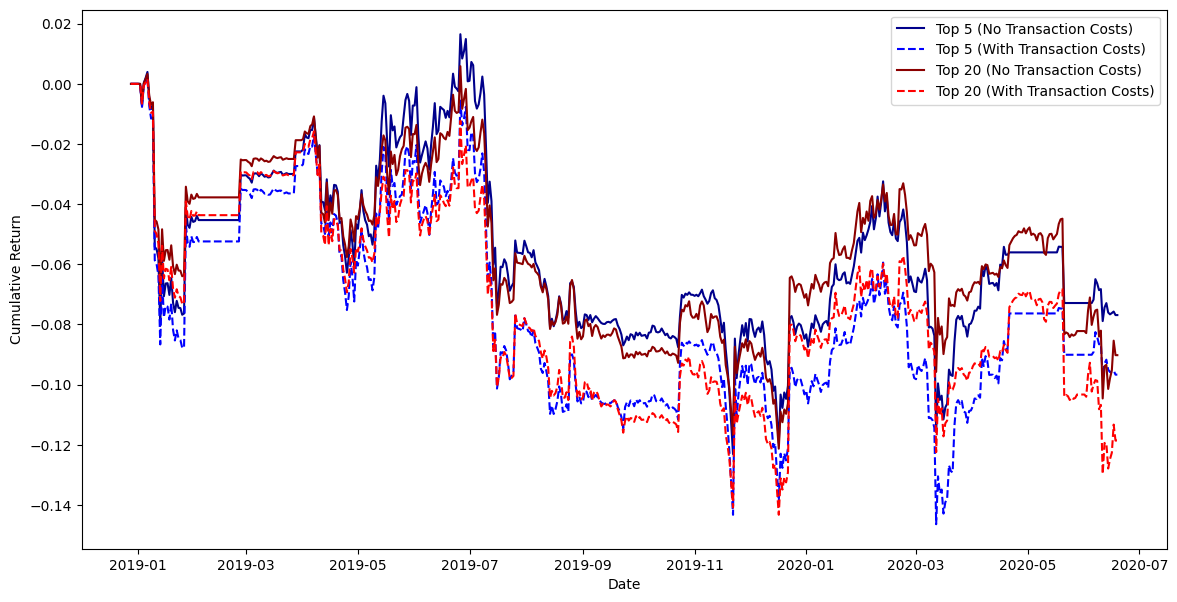

In [6]:
# Combine the cumulative returns for all periods into a single DF
top_5_cumulative_returns_gross = pd.concat(top_5_cumulative_returns['gross'], axis=1)
top_5_cumulative_returns_net = pd.concat(top_5_cumulative_returns['net'], axis=1)
top_20_cumulative_returns_gross = pd.concat(top_20_cumulative_returns['gross'], axis=1)
top_20_cumulative_returns_net = pd.concat(top_20_cumulative_returns['net'], axis=1)

# Find the average cumulative returns 
top_5_cumret_gross = top_5_cumulative_returns_gross.mean(axis=1)
top_5_cumret_net = top_5_cumulative_returns_net.mean(axis=1)
top_20_cumret_gross = top_20_cumulative_returns_gross.mean(axis=1)
top_20_cumret_net = top_20_cumulative_returns_net.mean(axis=1)


# Plot the final cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(top_5_cumret_gross, label='Top 5 (No Transaction Costs)', color='darkblue')
plt.plot(top_5_cumret_net, label='Top 5 (With Transaction Costs)', color='blue', linestyle='--')
plt.plot(top_20_cumret_gross, label='Top 20 (No Transaction Costs)', color='darkred')
plt.plot(top_20_cumret_net, label='Top 20 (With Transaction Costs)', color='red', linestyle='--')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()



In [7]:
# Compare performance before and after the time split
all_stats_before, all_stats_after = aggregate_timeframe(all_stats, split_date)

_, overall_summary_before_net = compute_overall_statistics(all_stats_before, gross_needed=False)
print(f"\n* Overall Summary for Period from {start_date.date()} To {split_date.date()}*")
display_summary_table(overall_summary_before_net)
_, overall_summary_after_net = compute_overall_statistics(all_stats_after, gross_needed=False)
print(f"\n* Overall Summary for Period from {split_date.date()} To {end_date.date()}*")
display_summary_table(overall_summary_after_net)


* Overall Summary for Period from 2018-01-01 To 2019-07-01*
+--------------------------------+--------------+--------------+--------------+
| Statistic                      |        Top 5 |       Top 20 |    All Pairs |
+================================+==============+==============+==============+
| avg_excess_return              | -0.000678623 | -0.000717552 | -0.000824063 |
+--------------------------------+--------------+--------------+--------------+
| std_excess_return              |  0.0116877   |  0.0110467   |  0.011297    |
+--------------------------------+--------------+--------------+--------------+
| avg_price_deviation_trigger    |  0.0880556   |  0.0833102   |  0.0880474   |
+--------------------------------+--------------+--------------+--------------+
| avg_pairs_traded_per_period    |  1.01852     |  3.23796     |  9.60556     |
+--------------------------------+--------------+--------------+--------------+
| avg_round_trip_trades_per_pair | 36.6667      | 35.1     

In [8]:
# Display overall category statistics
overall_category_stats_df = pd.DataFrame(overall_category_stats).T
print("\n* Overall Category Statistics *")
print(tabulate(overall_category_stats_df.reset_index().values, headers=['Category'] + overall_category_stats_df.columns.tolist(), tablefmt='grid'))



* Overall Category Statistics *
+-----------------+---------------------+---------------------+-------------------------------+-------------------------------+----------------------------------+----------------------------------+------------------------------+------------------------------+
| Category        |   avg_excess_return |   std_excess_return |   avg_price_deviation_trigger |   avg_pairs_traded_per_period |   avg_round_trip_trades_per_pair |   std_round_trip_trades_per_pair |   avg_time_pairs_open_months |   std_time_pairs_open_months |
+=================+=====================+=====================+===============================+===============================+==================================+==================================+==============================+==============================+
| Payments        |        -0.000773254 |          0.0104633  |                     0.0917949 |                     2.37521   |                          39.7333 |                         